In [26]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix,solvers
np.random.seed(22)

means=[[2,2],[4,2]]
cov=[[0.3,.2],[.2,.3]]
N=10
X0=np.random.multivariate_normal(means[0],cov,N)
X1=np.random.multivariate_normal(means[1],cov,N)
X=np.concatenate((X0,X1),axis=0)
y=np.concatenate((np.ones(N),-np.ones(N)),axis=0)


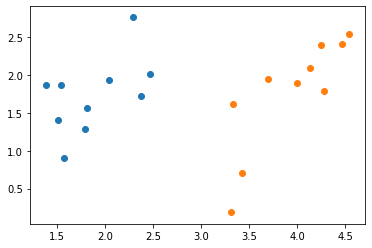

In [27]:
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
plt.show()


In [28]:
#solving the dual problem
V=np.concatenate((X0,-X1),axis=0)
Q=matrix(V.dot(V.T))
p=matrix(-np.ones((2*N,1)))

G=matrix(-np.eye(2*N))
h=matrix(np.zeros((2*N,1)))
A=matrix(y.reshape(1,-1))
b=matrix(np.zeros((1,1)))
solvers.options['show_process']=False
sol=solvers.qp(Q,p,G,h,A,b)
l=np.array(sol['x']) #solution lamda

#calculate w,b:
w=V.T.dot(l)
S=np.where(l>1e-8)[0]
b=np.mean(y[S].reshape(-1,1)-X[S,:].dot(w))
print("Number of super vector: ",S.size)
print(w.T)
print(b)

     pcost       dcost       gap    pres   dres
 0: -1.9286e+00 -4.1878e+00  4e+01  6e+00  2e+00
 1: -1.6207e+00 -3.2517e+00  3e+00  3e-01  8e-02
 2: -2.0082e+00 -2.2760e+00  4e-01  3e-02  8e-03
 3: -2.2149e+00 -2.2294e+00  2e-02  1e-03  3e-04
 4: -2.2249e+00 -2.2250e+00  2e-04  1e-05  3e-06
 5: -2.2250e+00 -2.2250e+00  2e-06  1e-07  3e-08
 6: -2.2250e+00 -2.2250e+00  2e-08  1e-09  3e-10
Optimal solution found.
Number of super vector:  3
[[-2.00984382  0.64068336]]
4.668560683288075


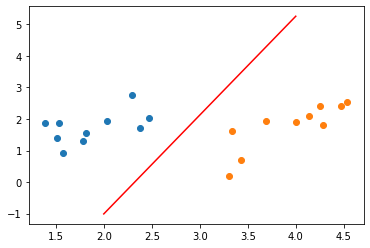

In [32]:
plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])
x1=np.linspace(2,4,100)
plt.plot(x1,(-b-w[0]*x1)/w[1],'r')
plt.show()

# Solution by sklearn


In [36]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1e5)
model=model.fit(X,y)
w=model.coef_
b=model.intercept_
print(w)
print(b)

[[-2.00971102  0.64194082]]
[4.66595309]
